## Exercise 2: Loading the Case Study Data

Import the pandas library:

In [2]:
import pandas as pd

Read data, which is in excel format, with read_excel:

In [3]:
df = pd.read_excel('default_of_credit_card_clients__courseware_version_1_21_19.xls')

View number of rows (samples) and columns:

In [4]:
df.shape

(30000, 25)

View first 5 rows of the data frame:

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


View basic info of the dataset (column name, count of non-null entries, data type of each column, memory usage):

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

## Exercise 3 and 4: Verifying Basic Data Integrity

First of all we can get the columns labels:

In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Then we may get the first 5 rows:

In [8]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Also the number of rows and columns:

In [9]:
df.shape

(30000, 25)

A **basic quality check** is to make sure that all account IDs are distinct. We can do that with the function *nunique()*:

In [10]:
df['ID'].nunique()

29687

So we have 30000 rows but only 29687 have unique ids. That means there are **duplicates**.

To find the duplicates, we can use *value_counts()*, which returns a Series where each unique ID is associated with the number of times it appears:

In [11]:
id_counts = df['ID'].value_counts()

In [12]:
type(id_counts)

pandas.core.series.Series

In [13]:
id_counts.shape

(29687,)

In [14]:
id_counts.head()

f0b963e7-4933    2
2458b96d-e8f1    2
b9591d1a-8480    2
1a055566-c187    2
8f9549b7-d5a4    2
Name: ID, dtype: int64

Getting number of ids with count 1 and number of ids with count 2:

In [15]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

### Removing duplicates: boolean masks

We want to create a boolean mask to filter out the duplicates. Using series == n creates another series with the same index and the value is True/False depending on whether the series value is n or not.

In [16]:
dupl_mask = id_counts == 2

In [17]:
dupl_mask

f0b963e7-4933     True
2458b96d-e8f1     True
b9591d1a-8480     True
1a055566-c187     True
8f9549b7-d5a4     True
                 ...  
029b7c3d-675c    False
f958b2ad-748a    False
42e18f48-a900    False
ee83b471-26c8    False
b484de51-2a97    False
Name: ID, Length: 29687, dtype: bool

Now we can get the ids of the accounts that appear twice. To do that we apply the mask to the Series:

In [18]:
dupl_id_counts = id_counts[dupl_mask]

In [19]:
dupl_id_counts

f0b963e7-4933    2
2458b96d-e8f1    2
b9591d1a-8480    2
1a055566-c187    2
8f9549b7-d5a4    2
                ..
98b8a2ca-8988    2
b74033dc-6e45    2
f6032812-464e    2
555a25cd-2d05    2
9611f432-7f70    2
Name: ID, Length: 313, dtype: int64

Then we get an index with the duplicate ids:

In [20]:
dupl_ids = dupl_id_counts.index

In [21]:
dupl_ids

Index(['f0b963e7-4933', '2458b96d-e8f1', 'b9591d1a-8480', '1a055566-c187',
       '8f9549b7-d5a4', '85bd7f39-2e9b', 'ac821a7b-b399', 'b557f3c2-ebec',
       '04299d54-61d4', 'fc73f07e-eb96',
       ...
       '3884eeca-7714', '9a75e346-c849', 'e8ee55be-0a11', '4f249cbc-5e9c',
       'dab579ee-1645', '98b8a2ca-8988', 'b74033dc-6e45', 'f6032812-464e',
       '555a25cd-2d05', '9611f432-7f70'],
      dtype='object', length=313)

Convert to list with list() method:

In [22]:
dupl_ids = list(dupl_ids)

In [23]:
len(dupl_ids)

313

Now we want to visualize what is happening with the accounts that have two rows:

In [24]:
df['ID'].isin(dupl_ids[0:3])

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: ID, Length: 30000, dtype: bool

In [25]:
df.loc[df['ID'].isin(dupl_ids[0:3]), :].head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
14027,f0b963e7-4933,260000,2,2,1,48,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
14127,f0b963e7-4933,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18477,2458b96d-e8f1,60000,2,2,2,25,-1,-1,0,0,...,6682,6223,7007,7353,2007,2011,2005,3003,3005,0
18577,2458b96d-e8f1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22740,b9591d1a-8480,190000,2,2,1,33,-2,-2,-2,-2,...,-5036,-5036,93493,0,1941,0,0,98529,3188,1


We can see that one row contains valid information and the other row contains all zeros. Therefore we must remove the rows that contain all zeros.

Now we will create a mask to filter out the columns that contain all zero except the first column. It will have to be a Boolean matrix of the same size as the dataset.

In [26]:
df_zero_mask = df == 0

In [27]:
df_zero_mask.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True


We are not quite there yet, because now we have to find the rows for which all the values (escept the ID) are True. We can use the *.all(axis=1)* method, which checks whether all elements are True.

In [28]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [29]:
type(feature_zero_mask)

pandas.core.series.Series

In [30]:
feature_zero_mask.value_counts()

False    29685
True       315
dtype: int64

Finally, we can remove all the rows with all zeros:

In [31]:
feature_zero_mask.index

RangeIndex(start=0, stop=30000, step=1)

In [32]:
df.index

RangeIndex(start=0, stop=30000, step=1)

In [33]:
df_clean = df.loc[~feature_zero_mask,:]

Let's see if that solved the duplicates problem:

In [34]:
df_clean.shape

(29685, 25)

In [35]:
df_clean['ID'].nunique()

29685

It worked!

## Exercise 5: Exploring and cleaning data

Obtain the data type of each column and non-null count:

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

The ID column is of no further interest, so the data type being object is not a problem.

However PAY_1 is of data type object, when it should be integer.  Let's look into that:

In [37]:
df_clean['PAY_1'].head()

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

Recall that in the data dictionary, PAY_n could have value -1 if it was payed duly, 1 if it was payed with 1 month delay, 2 for 2 months delay, etc... But there should be no zeroes.

In [38]:
df_clean['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

Here we see 2 undocumented values (0 and -2), and also the reason why this was imported as object data type (because of the presence of 'Not available' string). 

We will remove these rows from the dataset that have PAY_1 = 'Not available':

In [39]:
valid_pay1_mask = df_clean['PAY_1'] != 'Not available'

In [40]:
valid_pay1_mask.value_counts()

True     26664
False     3021
Name: PAY_1, dtype: int64

In [41]:
df_clean_2 = df_clean.loc[valid_pay1_mask,:]

In [42]:
df_clean_2.shape

(26664, 25)

In [43]:
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

Now we can transform the data type to int64:

In [44]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

/home/usuari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

Problem solved!

Now we get back in touch with the business partner and ask about the unknown values -2 and 0. We get the following new information:

- -2 means the account started that month with a zero balance and never used any credit
- -1 means the account had a balance that was paid in full
- 0 means at least the minimum payment was made, but the entire balance wasn't paid

We thank our business partner since this answers our questions. Maintaining a good line of communication and working relashionship with the business partner is important.

## Exercise 6: Exploring the Credit Limit and Demographic Features

First start with importing matplotlib:

In [46]:
import matplotlib.pyplot as plt #plotting package
%matplotlib inline

import matplotlib as mpl #additional functionalities

mpl.rcParams['figure.dpi'] = 400 #high resolution features

LIMIT_BAL and AGE are numberical features, meaning they are measured on a continuous scale. We'll use histograms to visualize them:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab62c155d0>,
      dtype=object)

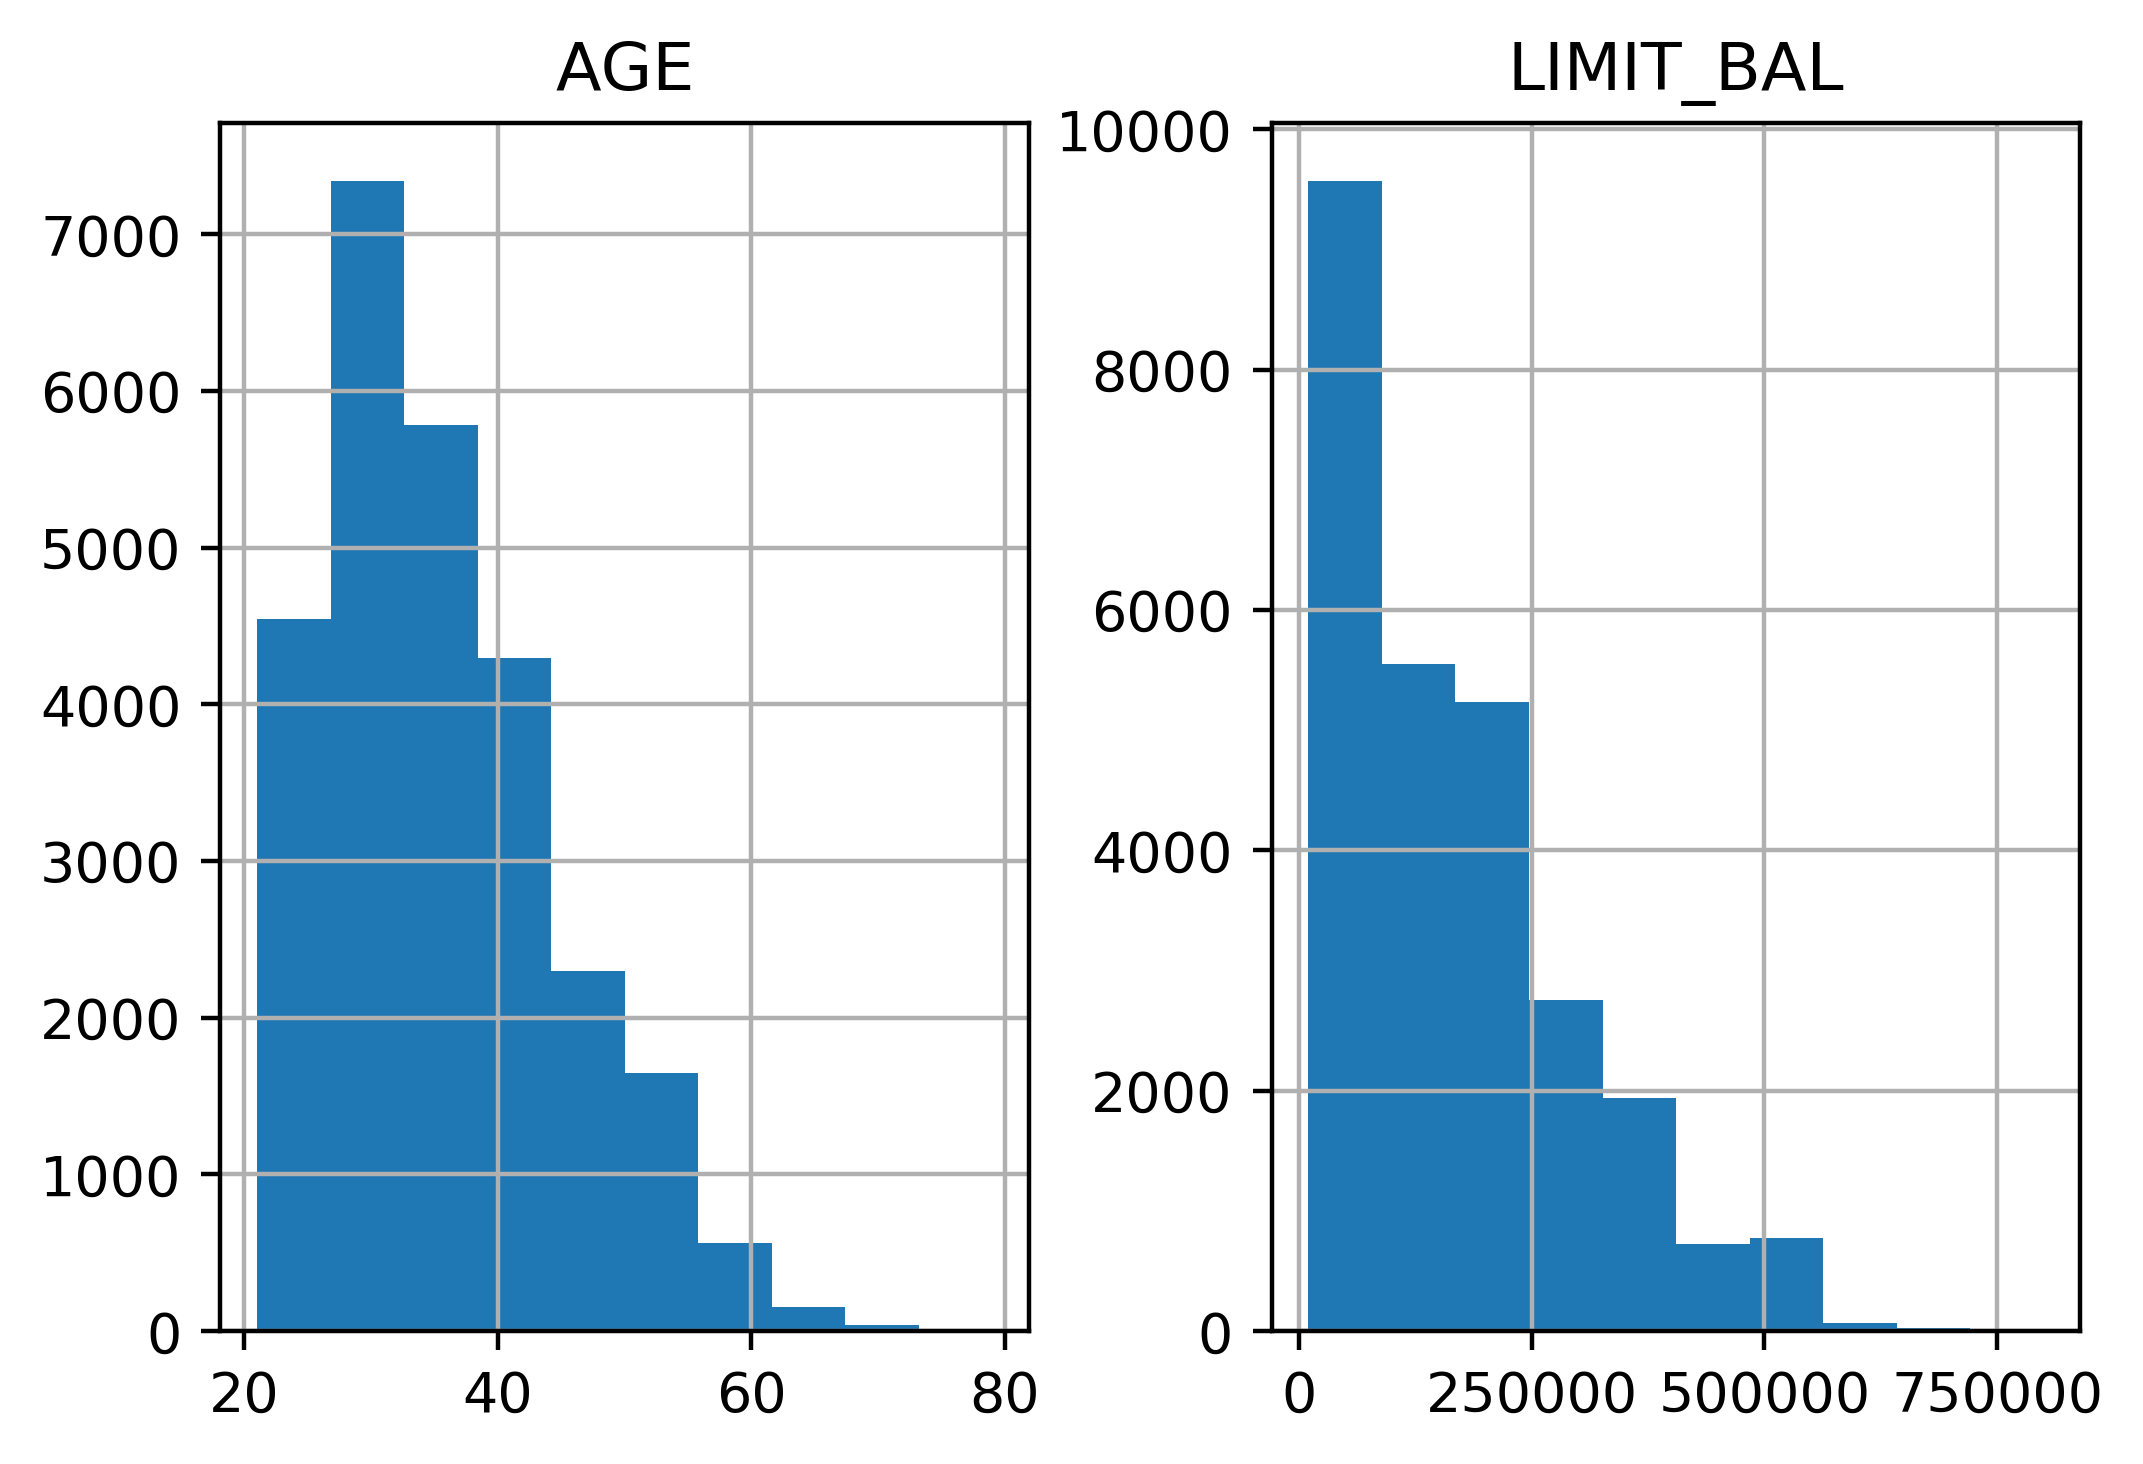

In [47]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

To see statistics such as mean and median (that is, the 50th percentile) we can use .describe():

In [48]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


For categorical variables, look at value_counts().

Let's start with EDUCATION:

In [49]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

We see undocumented values of 0, 5 and 6. Our business partners tells us they don't know about the others. Therefore, we will include them with the others category (4). We can do this with the *replace()* pandas method:

In [50]:
df_clean_2['EDUCATION'].replace(to_replace=[0,5,6],value=4, inplace=True)

/home/usuari/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [51]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

It worked!

Now let's look at MARRIAGE:

In [52]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

We also observe an undocumented value of 0. Let's replace it with 3 (which means others):

In [53]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

In [54]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

It worked!

## Deep dive: categorical features

Let's look at the EDUCATION categorical variable, which is in ordinal encoding.

For a binary classification model, you can look at the different levels of a categorical feature in terms of avg alues of the response variables (which represents 'rates' of positive classes). If the plot is linear, then ordinal encoding might work.

Therefore, let's plot education ordinal feature versus the default rate (rate of positive class, i.e., probability of default). We can use the groupby/agg pandas methods:

In [55]:
default_rate_vs_education = df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'})

In [56]:
default_rate_vs_education

,default payment next month
EDUCATION,
1,0.193901
2,0.235913
3,0.255479
4,0.074879


Bar plot:

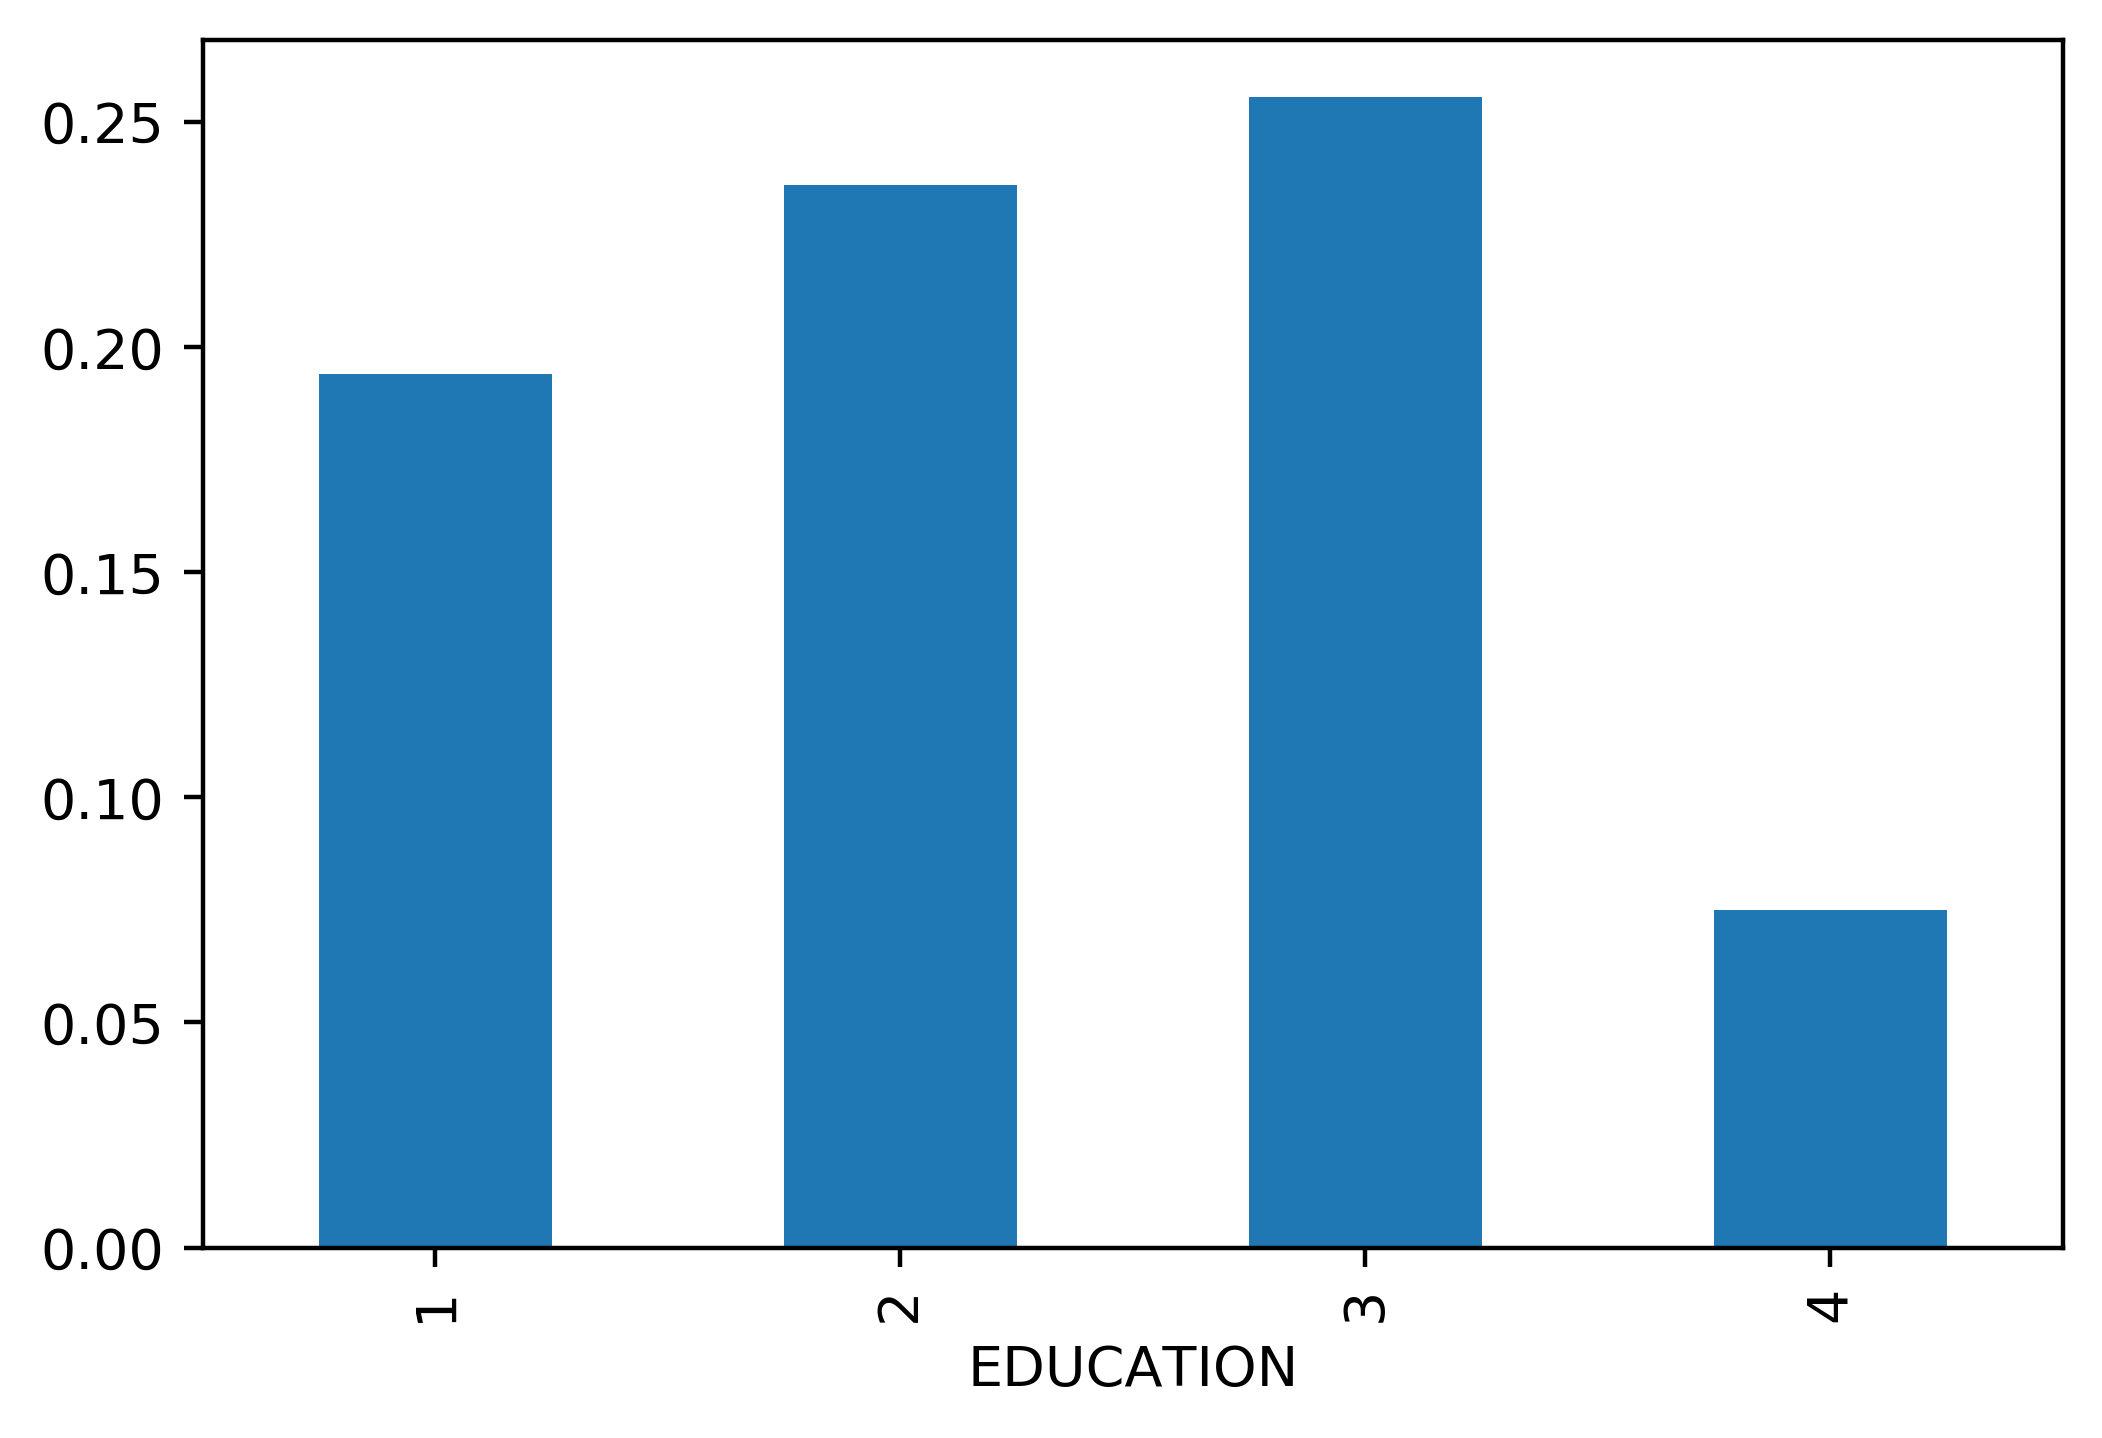

In [57]:
default_rate_vs_education.plot.bar(legend=False)

There's no linear relationship, therefore ordinal encoding might not work for a linear model.

## Exercise 7: Implementing OHE

In [58]:
df_clean_2['EDUCATION'].head()

0    2
1    2
2    2
3    2
4    2
Name: EDUCATION, dtype: int64

Create a new column for categorical labels:

In [59]:
df_clean_2['EDUCATION_CAT'] = 'none'

/home/usuari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


Create a dictionary that describes the mapping for education categories:

In [61]:
cat_mapping = {
    1:'graduate school',
    2: 'university',
    3: 'high school',
    4: 'others'
}

Apply the mapping to the original EDUCATION column using .map and assign the result to the new EDUCATION_CAT column:

In [62]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)

/home/usuari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


Now we are ready for OHE. We can do this by passing a Series of a DataFrame to the **pd.get_dummies()** function:

In [64]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])

In [65]:
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


Now we will concatenate the original df with this new df that contains the education OHE using the **pd.concat()** pandas function:

In [66]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)

In [67]:
df_with_ohe[['EDUCATION_CAT', 'graduate school', 'university', 'high school', 'others']].head(10)

,EDUCATION_CAT,graduate school,university,high school,others
0,university,0,1,0,0
1,university,0,1,0,0
2,university,0,1,0,0
3,university,0,1,0,0
4,university,0,1,0,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,1,0,0
8,high school,0,0,1,0
9,high school,0,0,1,0


## Exploring the Financial History Features in the Dataset

First of all we are going to read the clean csv:

In [68]:
df = pd.read_csv('Chapter_1_cleaned_data.csv')

In [69]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,none,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,university,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,university,0,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,university,0,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,university,0,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,university,0,0,0,0,1


In [70]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'none', 'others', 'university'],
      dtype='object')

In [71]:
df.shape

(26664, 31)

1. Let's start witht the PAY status history. 'PAY_1' is for September, 'PAY_2' is for August, 'PAY_3' is for July ...

In [72]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [73]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


We observe that the range of values is -2,-1, 0, ..., 8 for all features. It seems that the value 9 which is "payment delay for nine months and above" is never observed.

In [74]:
df['PAY_1'].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

75% of the data is above the value 0, so we see that the majority of accounts were not used, were paid in full or made at least the minimum payment.

Let's have a histogram as well:

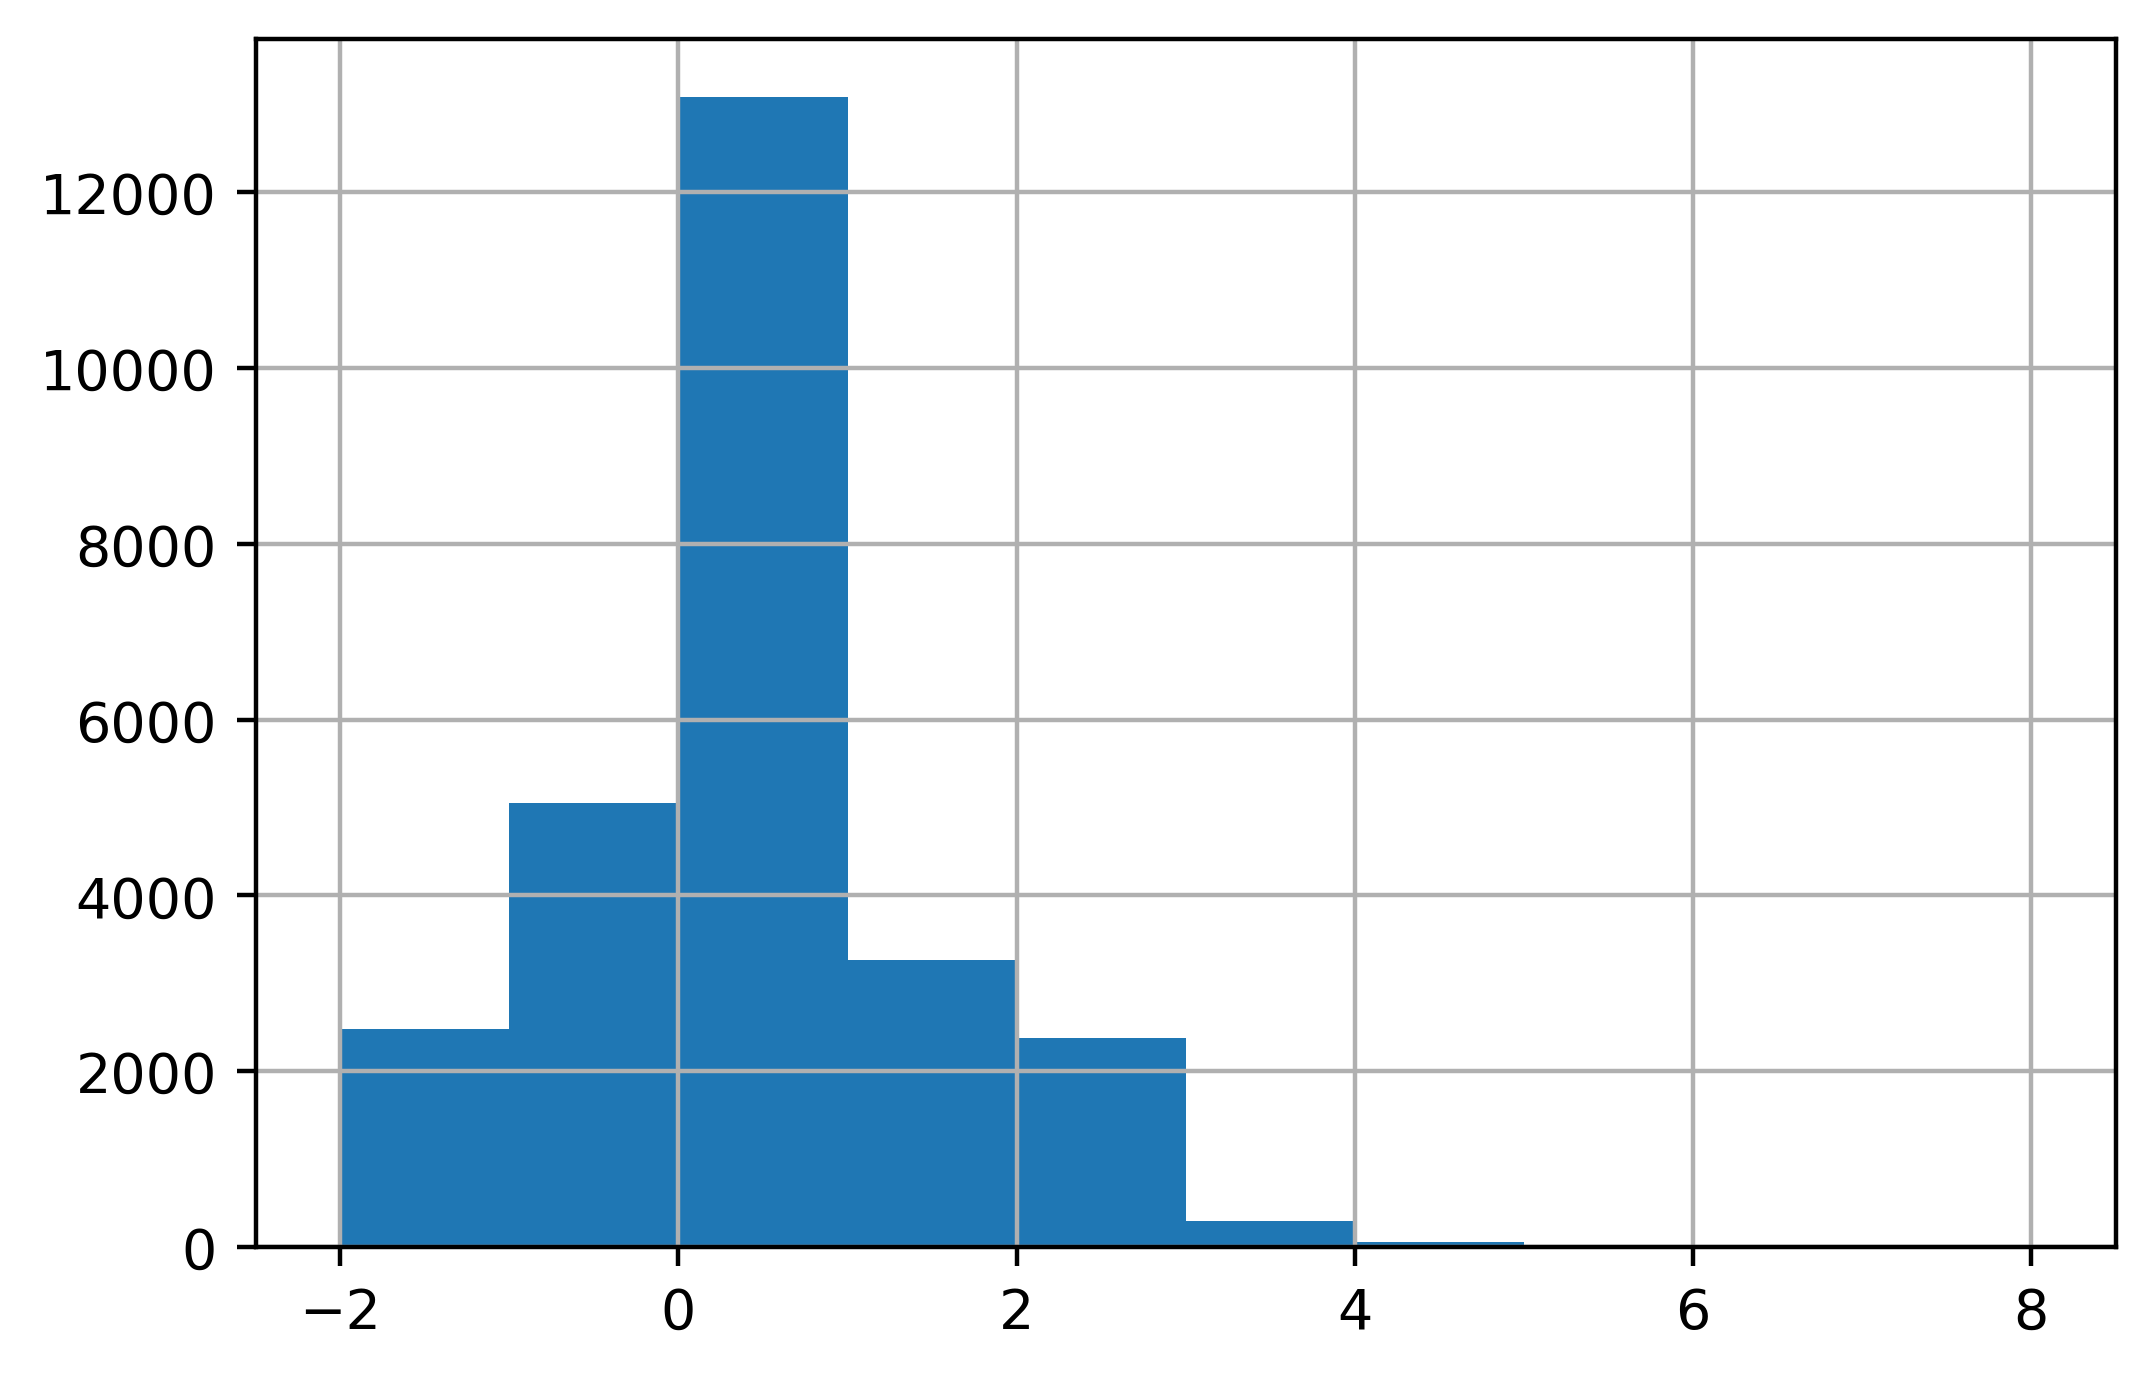

In [75]:
df['PAY_1'].hist()

A better visualization would be if the bin edges were centered around the number. We can do that by specifying the *bins* keyword. The *bins* keyword takes the value of the left edge of each bin:

In [77]:
import numpy as np

In [78]:
pay_1_bins = np.array(range(-2, 10)) -0.5

In [79]:
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

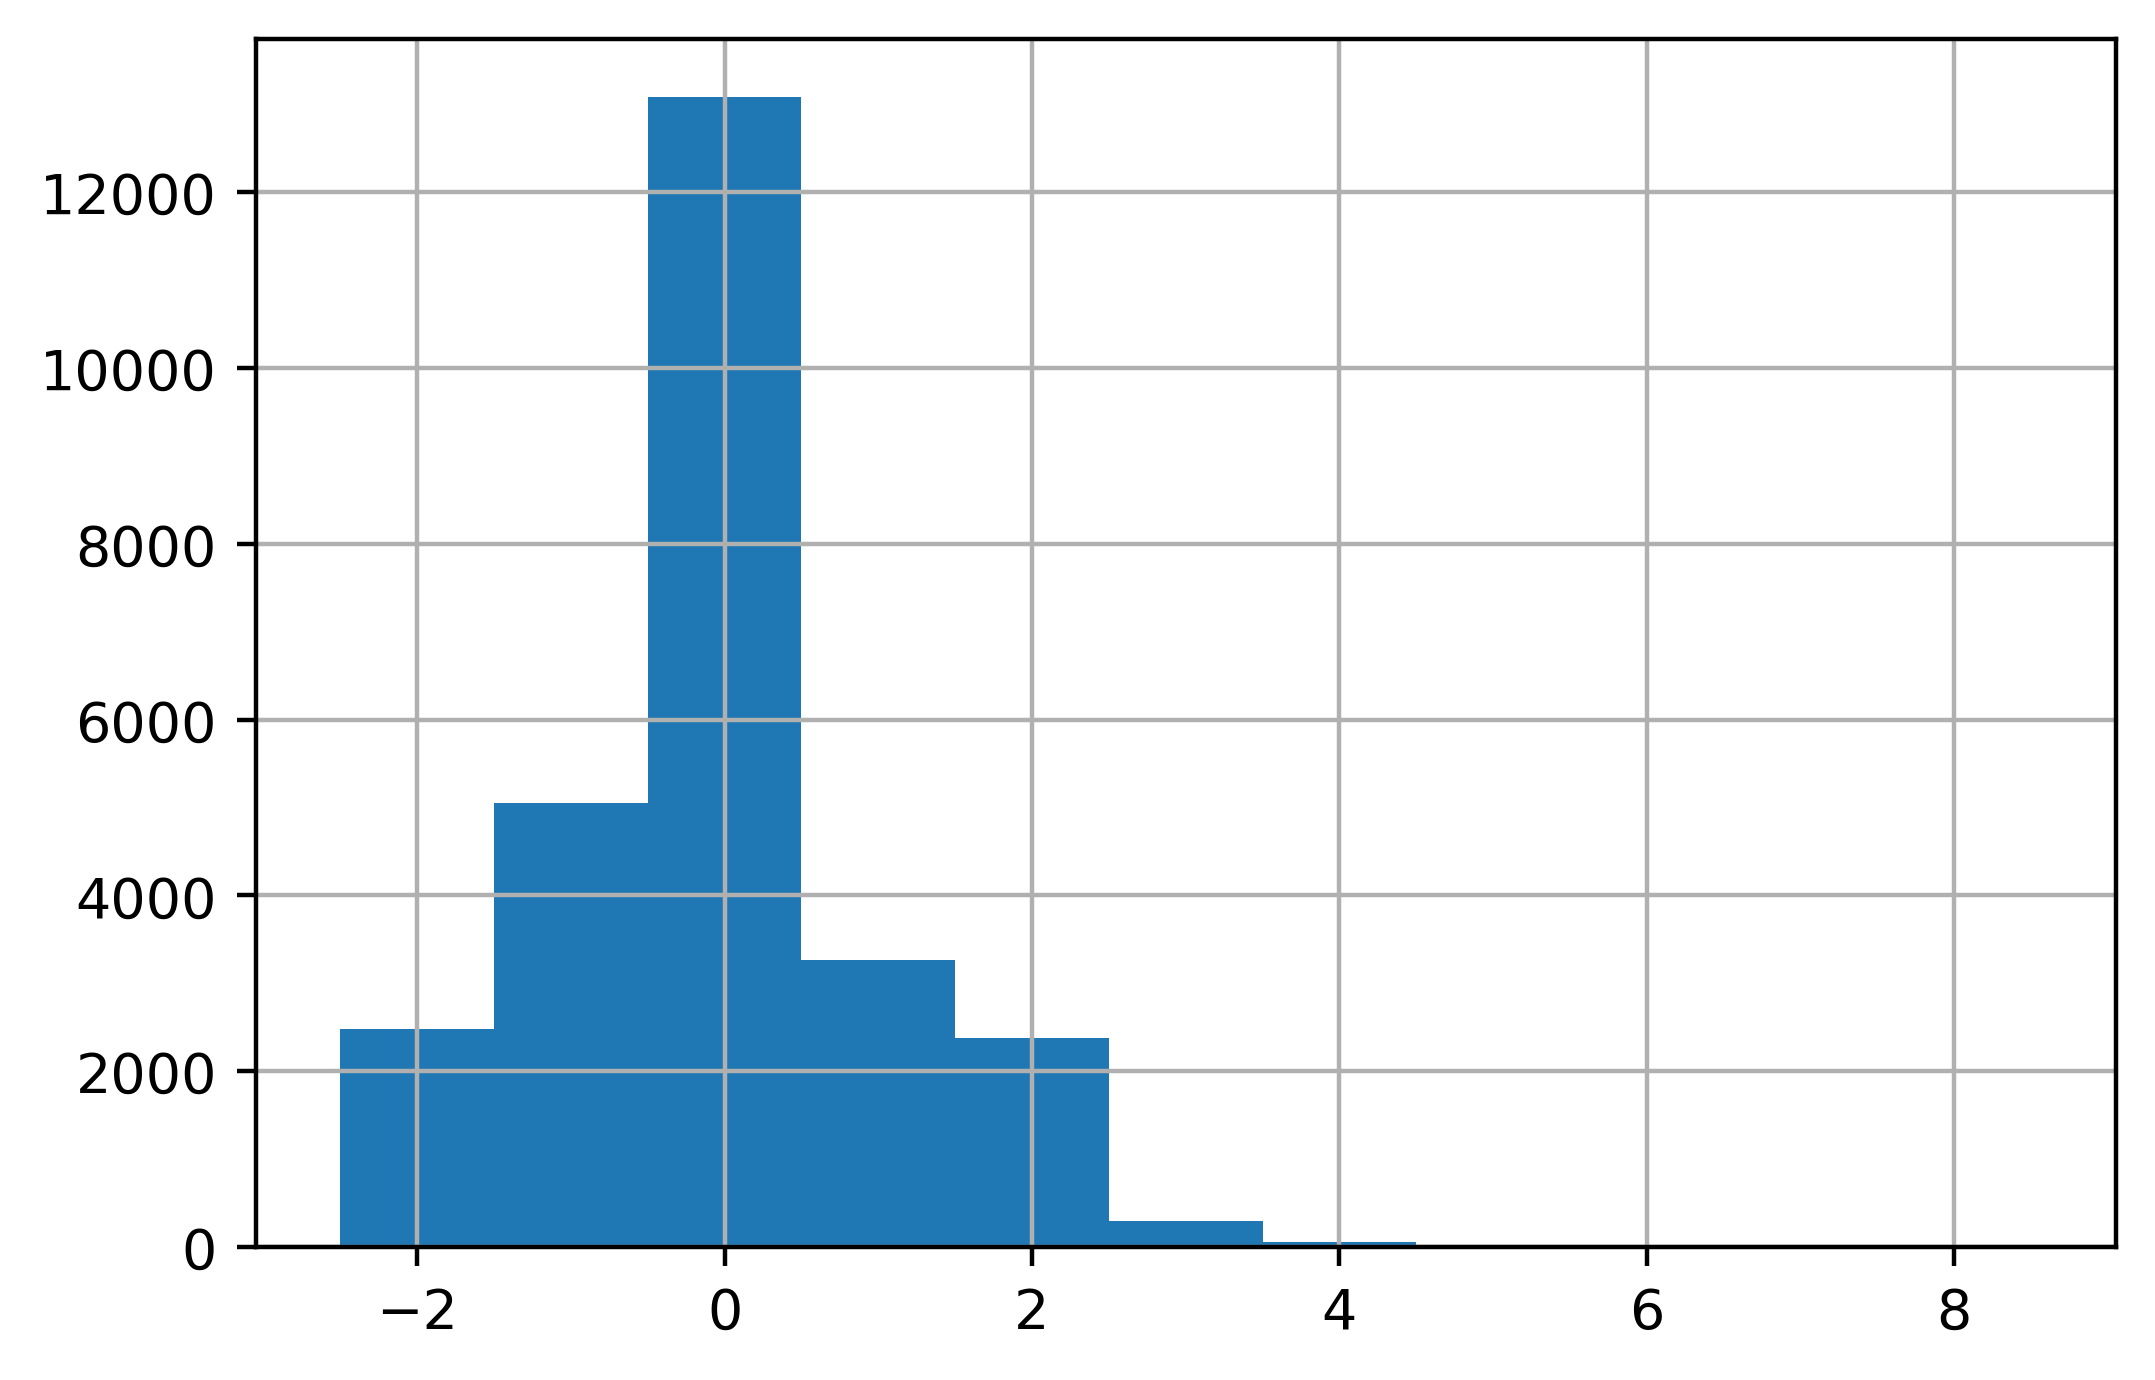

In [80]:
df['PAY_1'].hist(bins=pay_1_bins)

This confirms that most accounts are in good standing (-2,-1,0). For those that aren't, it's more common for the "months late" to be a smalelr number. This makes sense, because otherwise their account might be closed.

Now let's use pandas to plot multiple histograms together for all the pay status for the past 6 months:

In [82]:
mpl.rcParams['font.size'] = 4

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab610b2f50>,
      dtype=object)

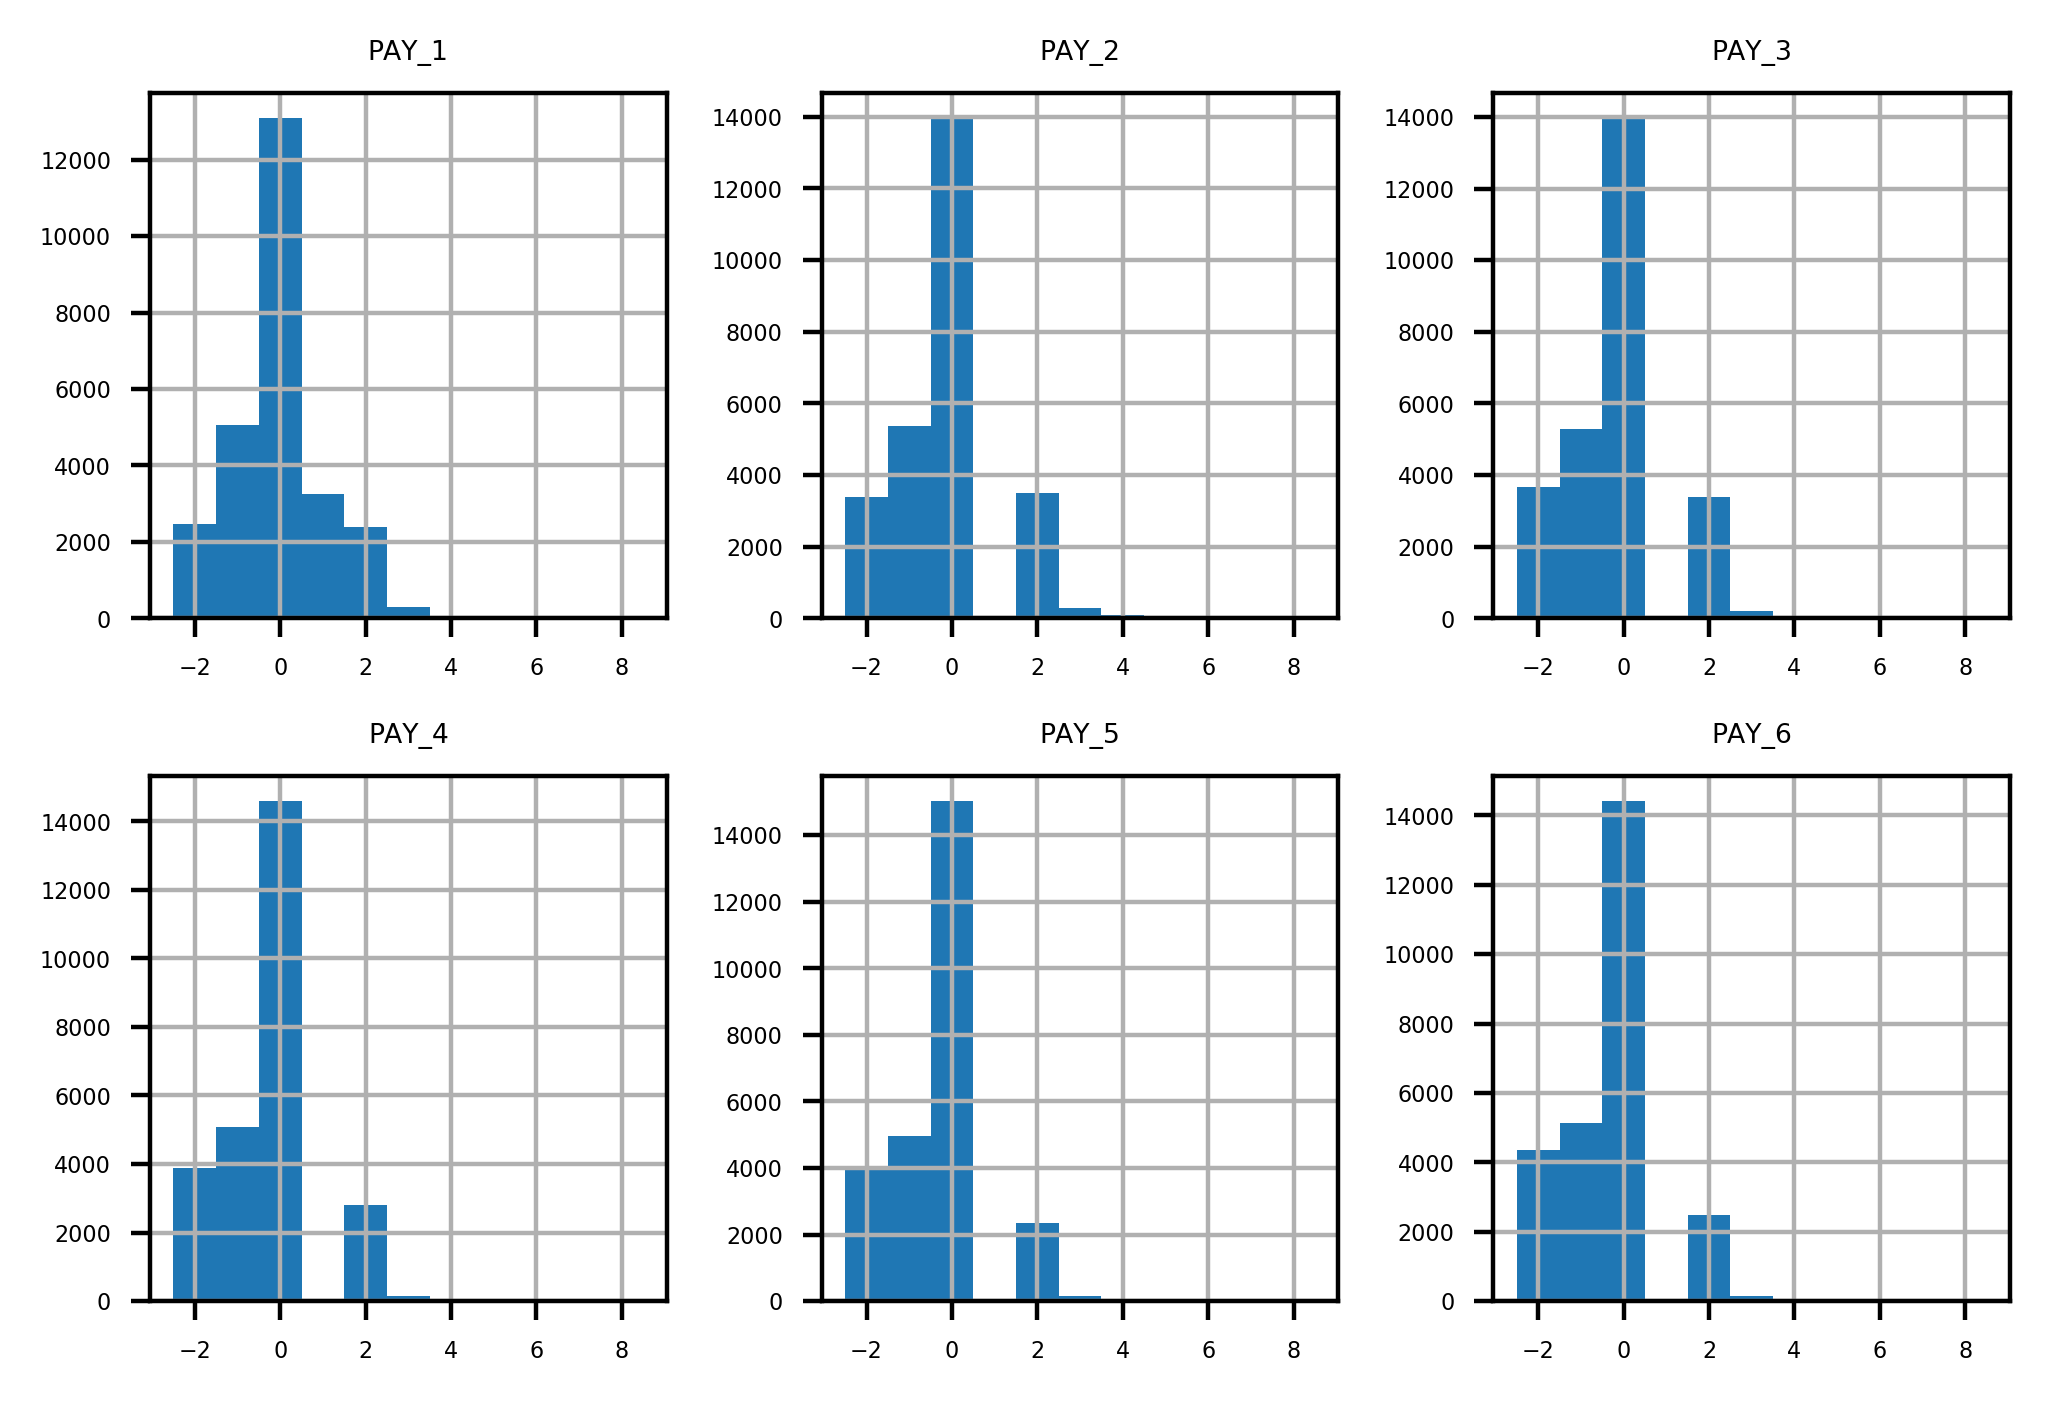

In [83]:
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

Observation: on July (PAY_3) there are almost no accounts with 1 month payment delay. However on August (PAY_2) there a considerable ammount of accounts with a 2-months delay. However the only way to get a 2-month delay on August is from a 1-month delay in July. That means that the number of accounts with a 2-month delay on August should be less than the number of accounts with a  1-month delay on July.

Let's deep dive into that:

In [88]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']]

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2
...,...,...
26640,2,2
26641,2,3
26646,2,2
26655,2,2


We see that none of the accounts that in August have a 2-month delay had a 1-month delay on July.

We contact the client about this problem and he tells us that there has been a problem with the query leading to faulty reporting for accounts that had a 1-month delay in payment. This problem was fixed on September.

That means that we will only be able to use PAY_1 for our predictive model, since the other months contain incorrect information.

Only by carefuly combing through the data did we find this problem. It would've been nice if the client had told us, but ultimately it is our responsibility to build a credible model.

## Activity 1: Exploring Remaining Features

In [89]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'none', 'others', 'university'],
      dtype='object')

Let's explore the **bill amount features**. This is a continuous numerical variable with the amount of the bill.

In [90]:
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

Let's describe each column:

In [93]:
for feat in bill_feats:
    print(df[feat].describe())

count     26664.000000
mean      51405.730723
std       73633.687106
min     -165580.000000
25%        3580.000000
50%       22361.000000
75%       67649.750000
max      746814.000000
Name: BILL_AMT1, dtype: float64
count     26664.000000
mean      49300.001500
std       70934.549534
min      -69777.000000
25%        2999.750000
50%       21150.000000
75%       64395.500000
max      671563.000000
Name: BILL_AMT2, dtype: float64
count     26664.000000
mean      47026.340047
std       68705.359524
min     -157264.000000
25%        2627.250000
50%       20079.500000
75%       60360.000000
max      855086.000000
Name: BILL_AMT3, dtype: float64
count     26664.000000
mean      43338.894539
std       64275.250740
min     -170000.000000
25%        2341.750000
50%       19037.000000
75%       54727.500000
max      706864.000000
Name: BILL_AMT4, dtype: float64
count     26664.000000
mean      40338.136701
std       60705.944083
min      -81334.000000
25%        1745.000000
50%       18066.00000

Now let's plot histograms with 20 bins:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab5fef7910>,
      dtype=object)

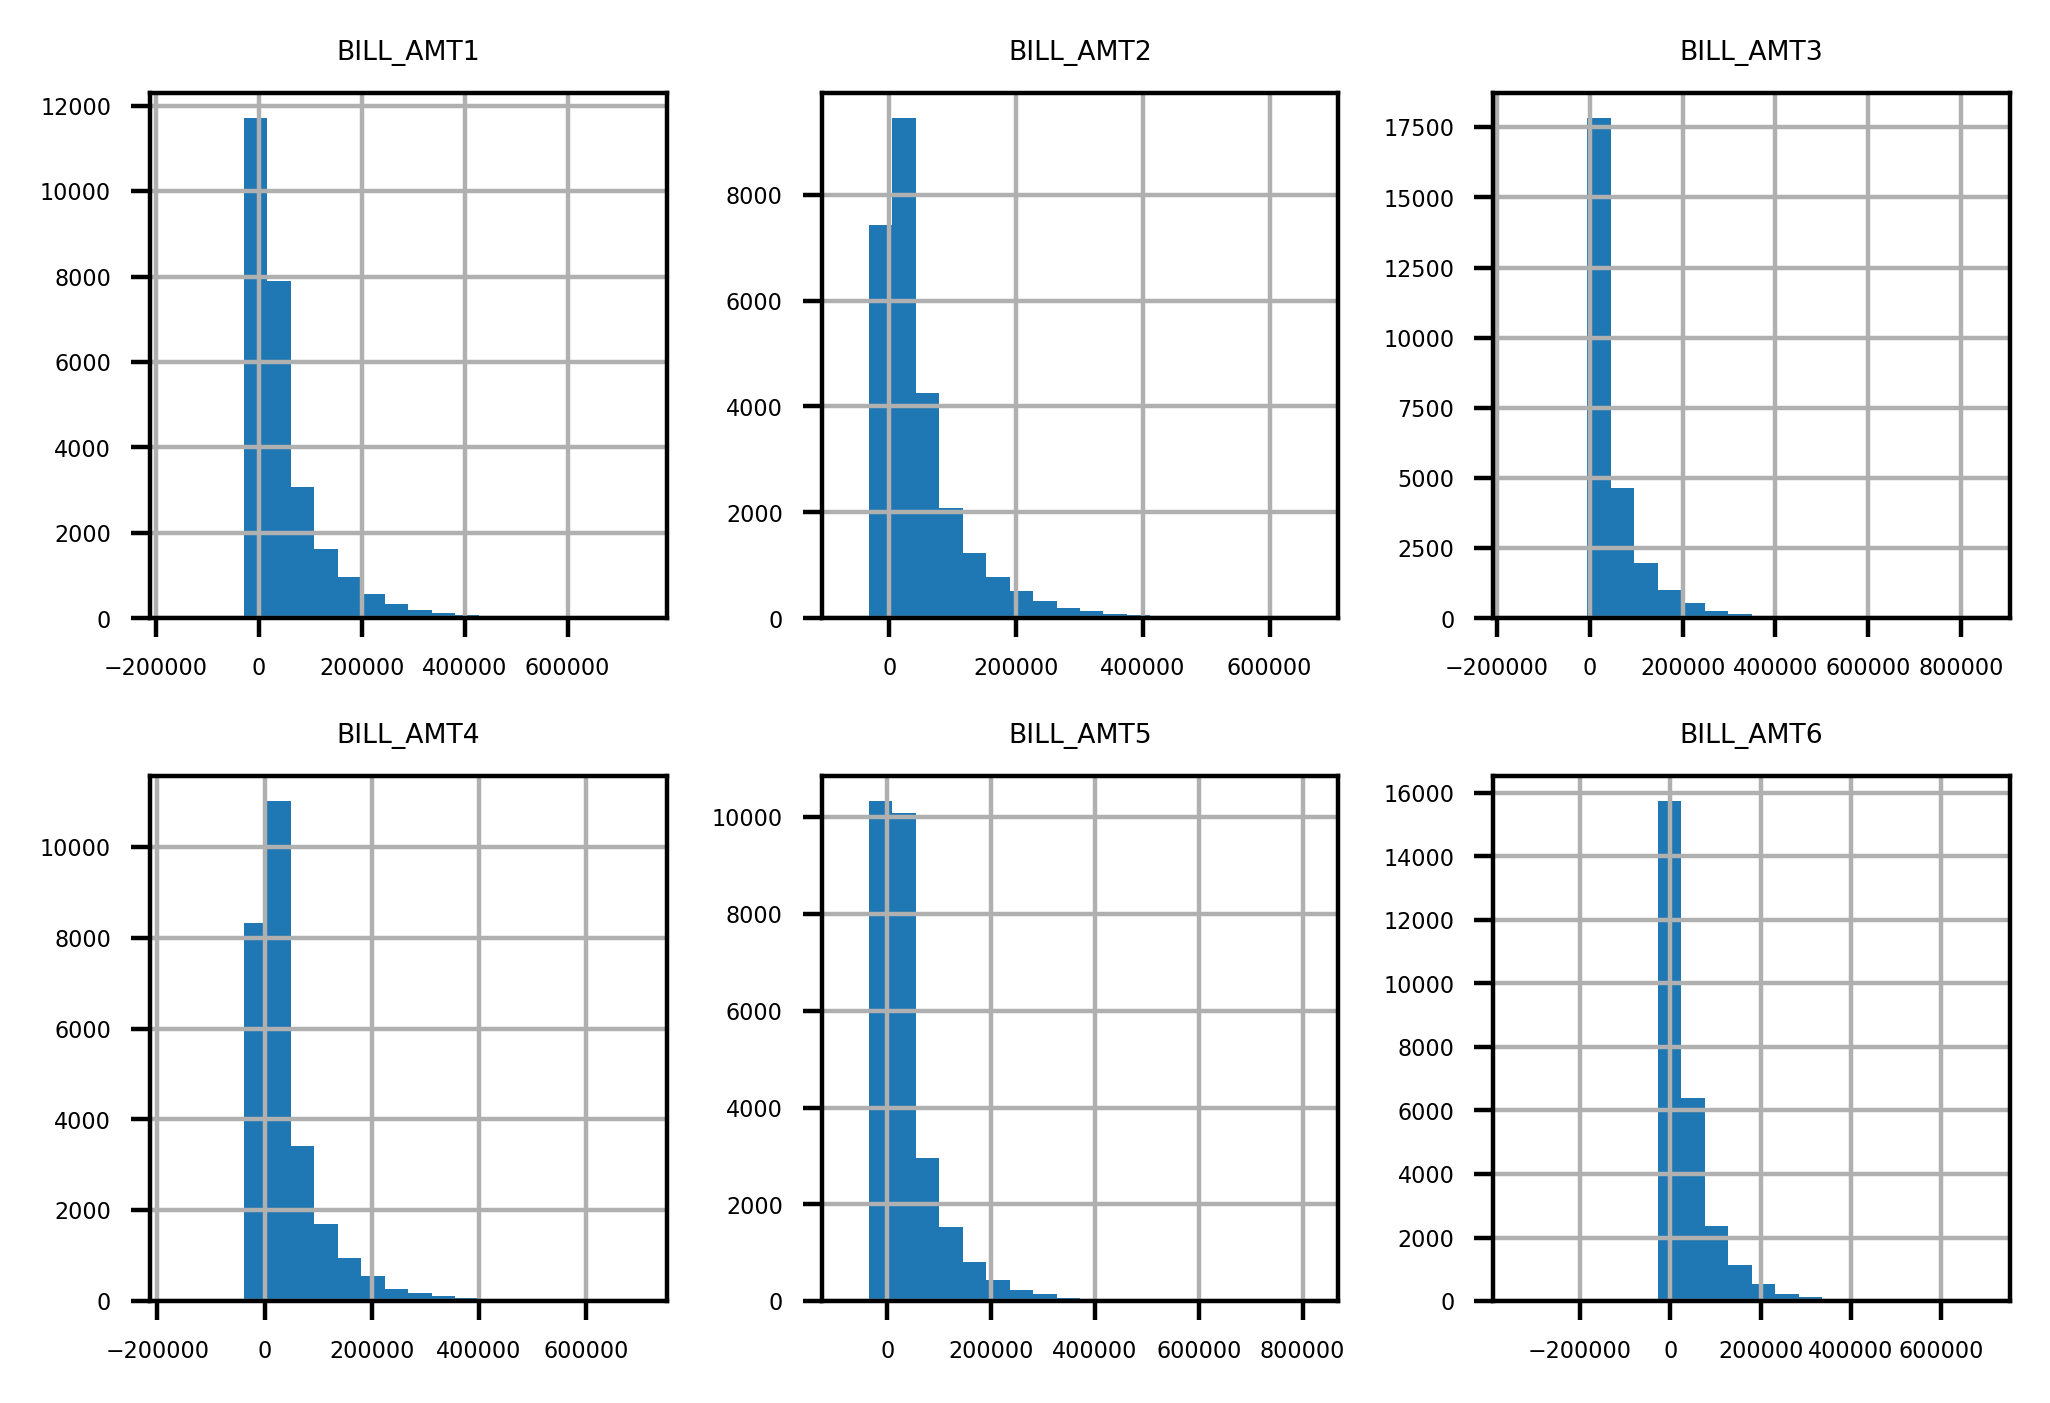

In [95]:
df[bill_feats].hist(bins=20, layout=(2,3))

Now let's explore the **bill payment features**:

In [97]:
payamt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [99]:
for feat in payamt_feats:
    print(df[feat].describe())

count     26664.000000
mean       5704.085771
std       16699.398632
min           0.000000
25%        1000.000000
50%        2114.500000
75%        5027.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64
count    2.666400e+04
mean     5.881110e+03
std      2.121431e+04
min      0.000000e+00
25%      8.020000e+02
50%      2.007000e+03
75%      5.000000e+03
max      1.227082e+06
Name: PAY_AMT2, dtype: float64
count     26664.000000
mean       5259.514964
std       17265.439561
min           0.000000
25%         390.000000
50%        1822.000000
75%        4556.250000
max      889043.000000
Name: PAY_AMT3, dtype: float64
count     26664.000000
mean       4887.048717
std       15956.349371
min           0.000000
25%         294.750000
50%        1500.000000
75%        4050.500000
max      621000.000000
Name: PAY_AMT4, dtype: float64
count     26664.000000
mean       4843.729973
std       15311.721795
min           0.000000
25%         242.750000
50%        1500.000000
75%       

Now let's plot the histograms. We can rotate the x axis labels with xrot=30(30 degrees):

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab5a08a350>,
      dtype=object)

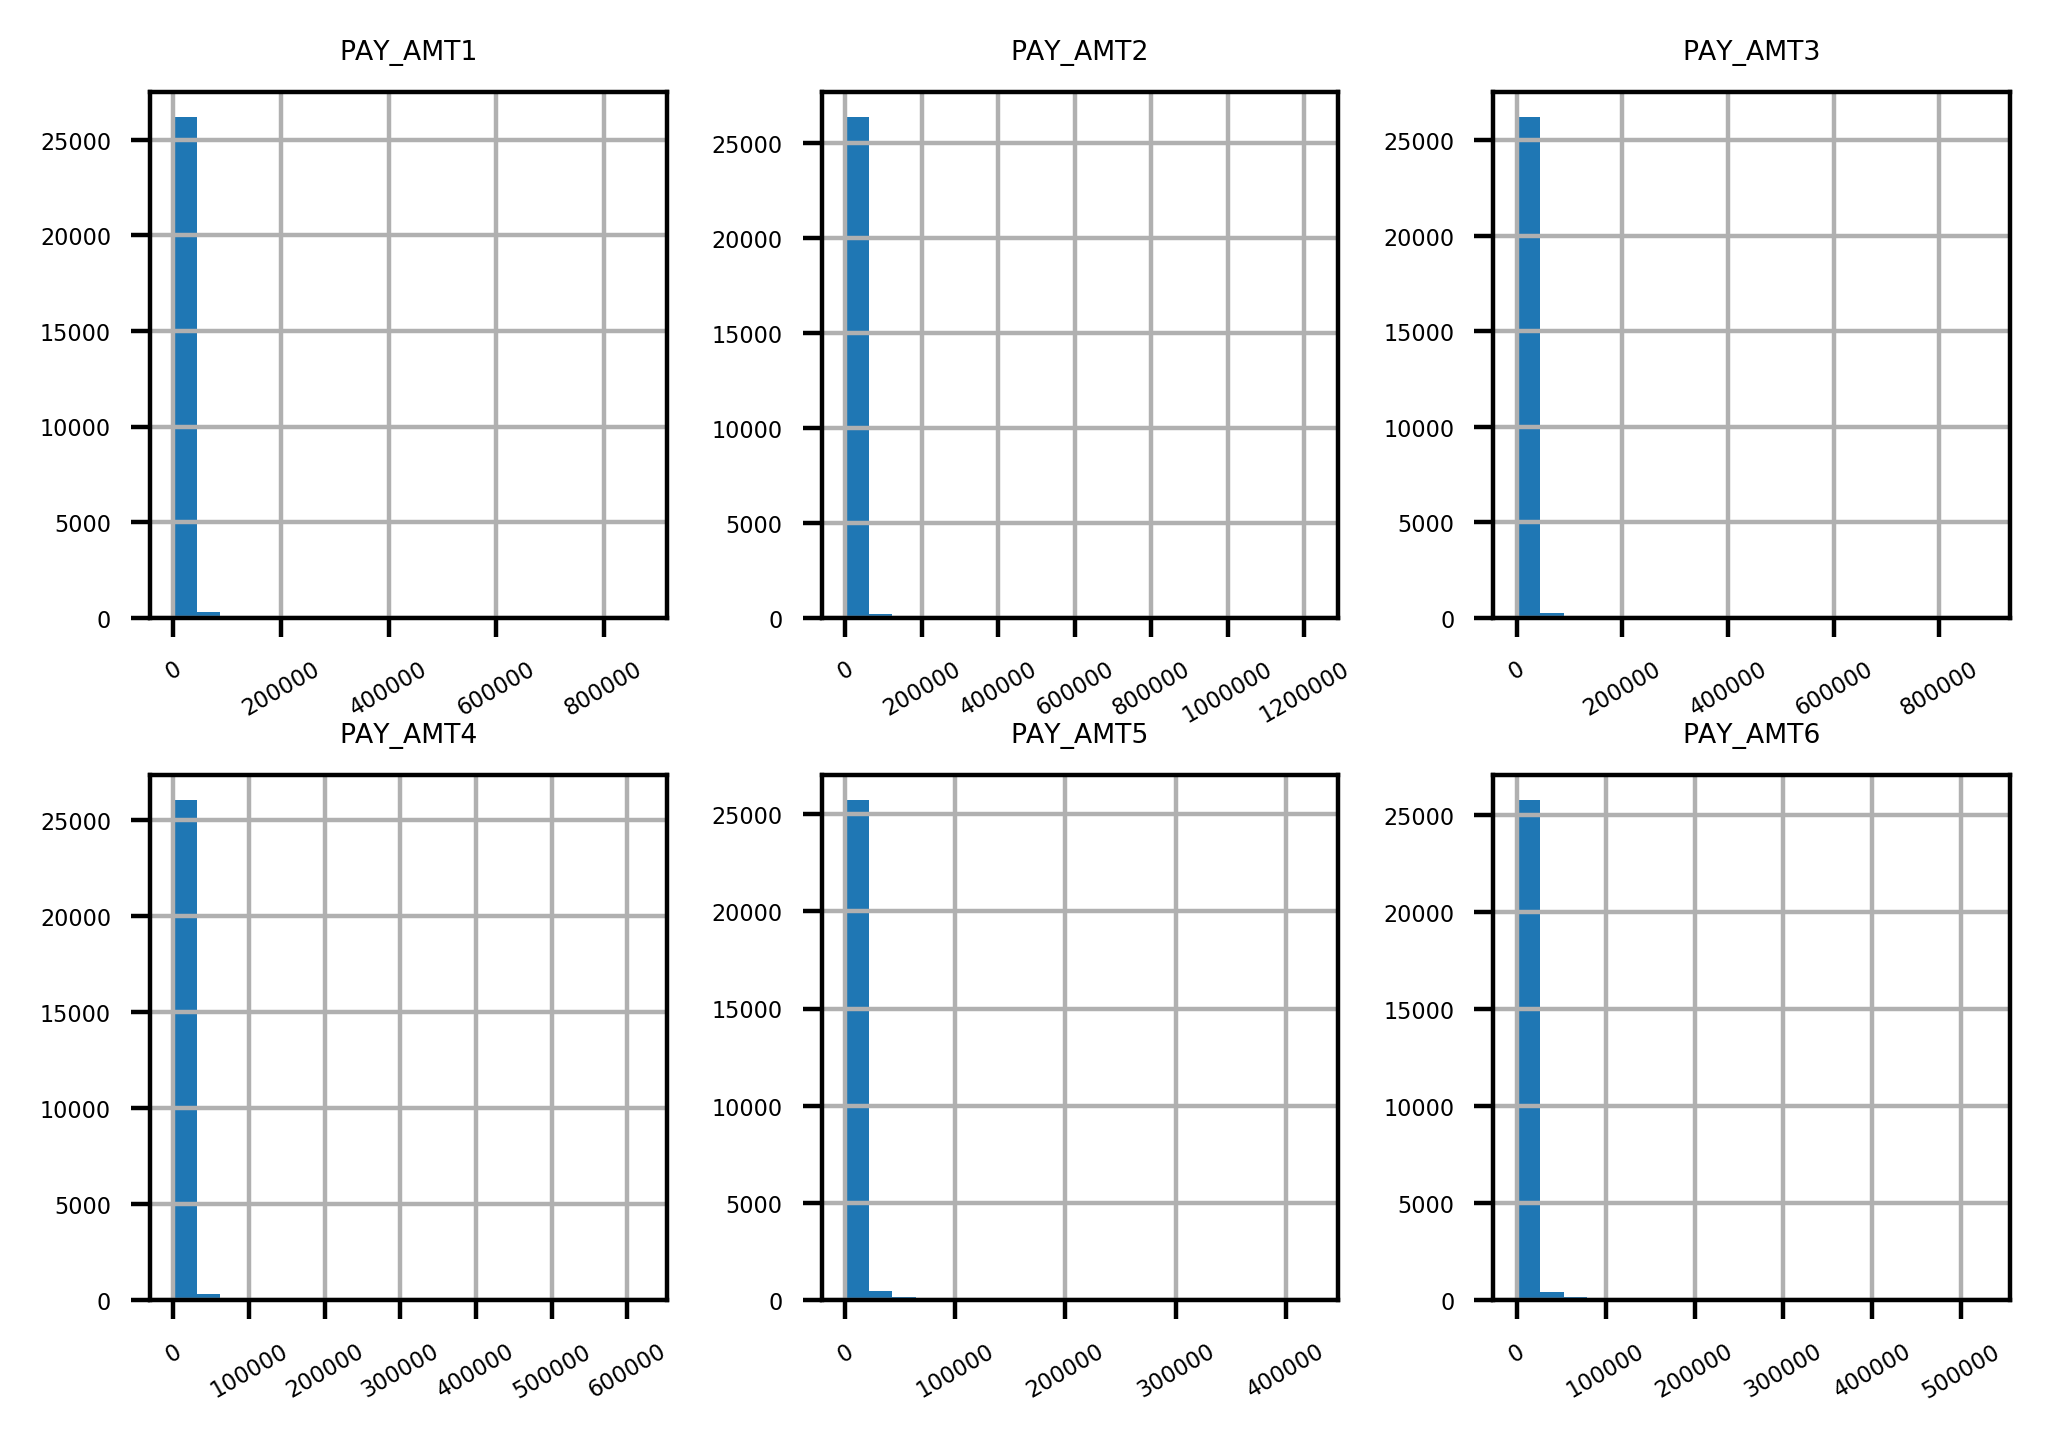

In [101]:
df[payamt_feats].hist(bins=20,layout=(2,3), xrot=30)

Now let's look at the accounts that made a payment exactly equal to 0:

In [102]:
pay_zero_mask = df[payamt_feats] == 0

In [103]:
pay_zero_mask.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [108]:
pay_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

Now let's use this mask to filter out the pay amounts equal to 0. We do this so we can apply the logarithm in base 10 and visualize the pay amount in logarithmic scale.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab58b80810>,
      dtype=object)

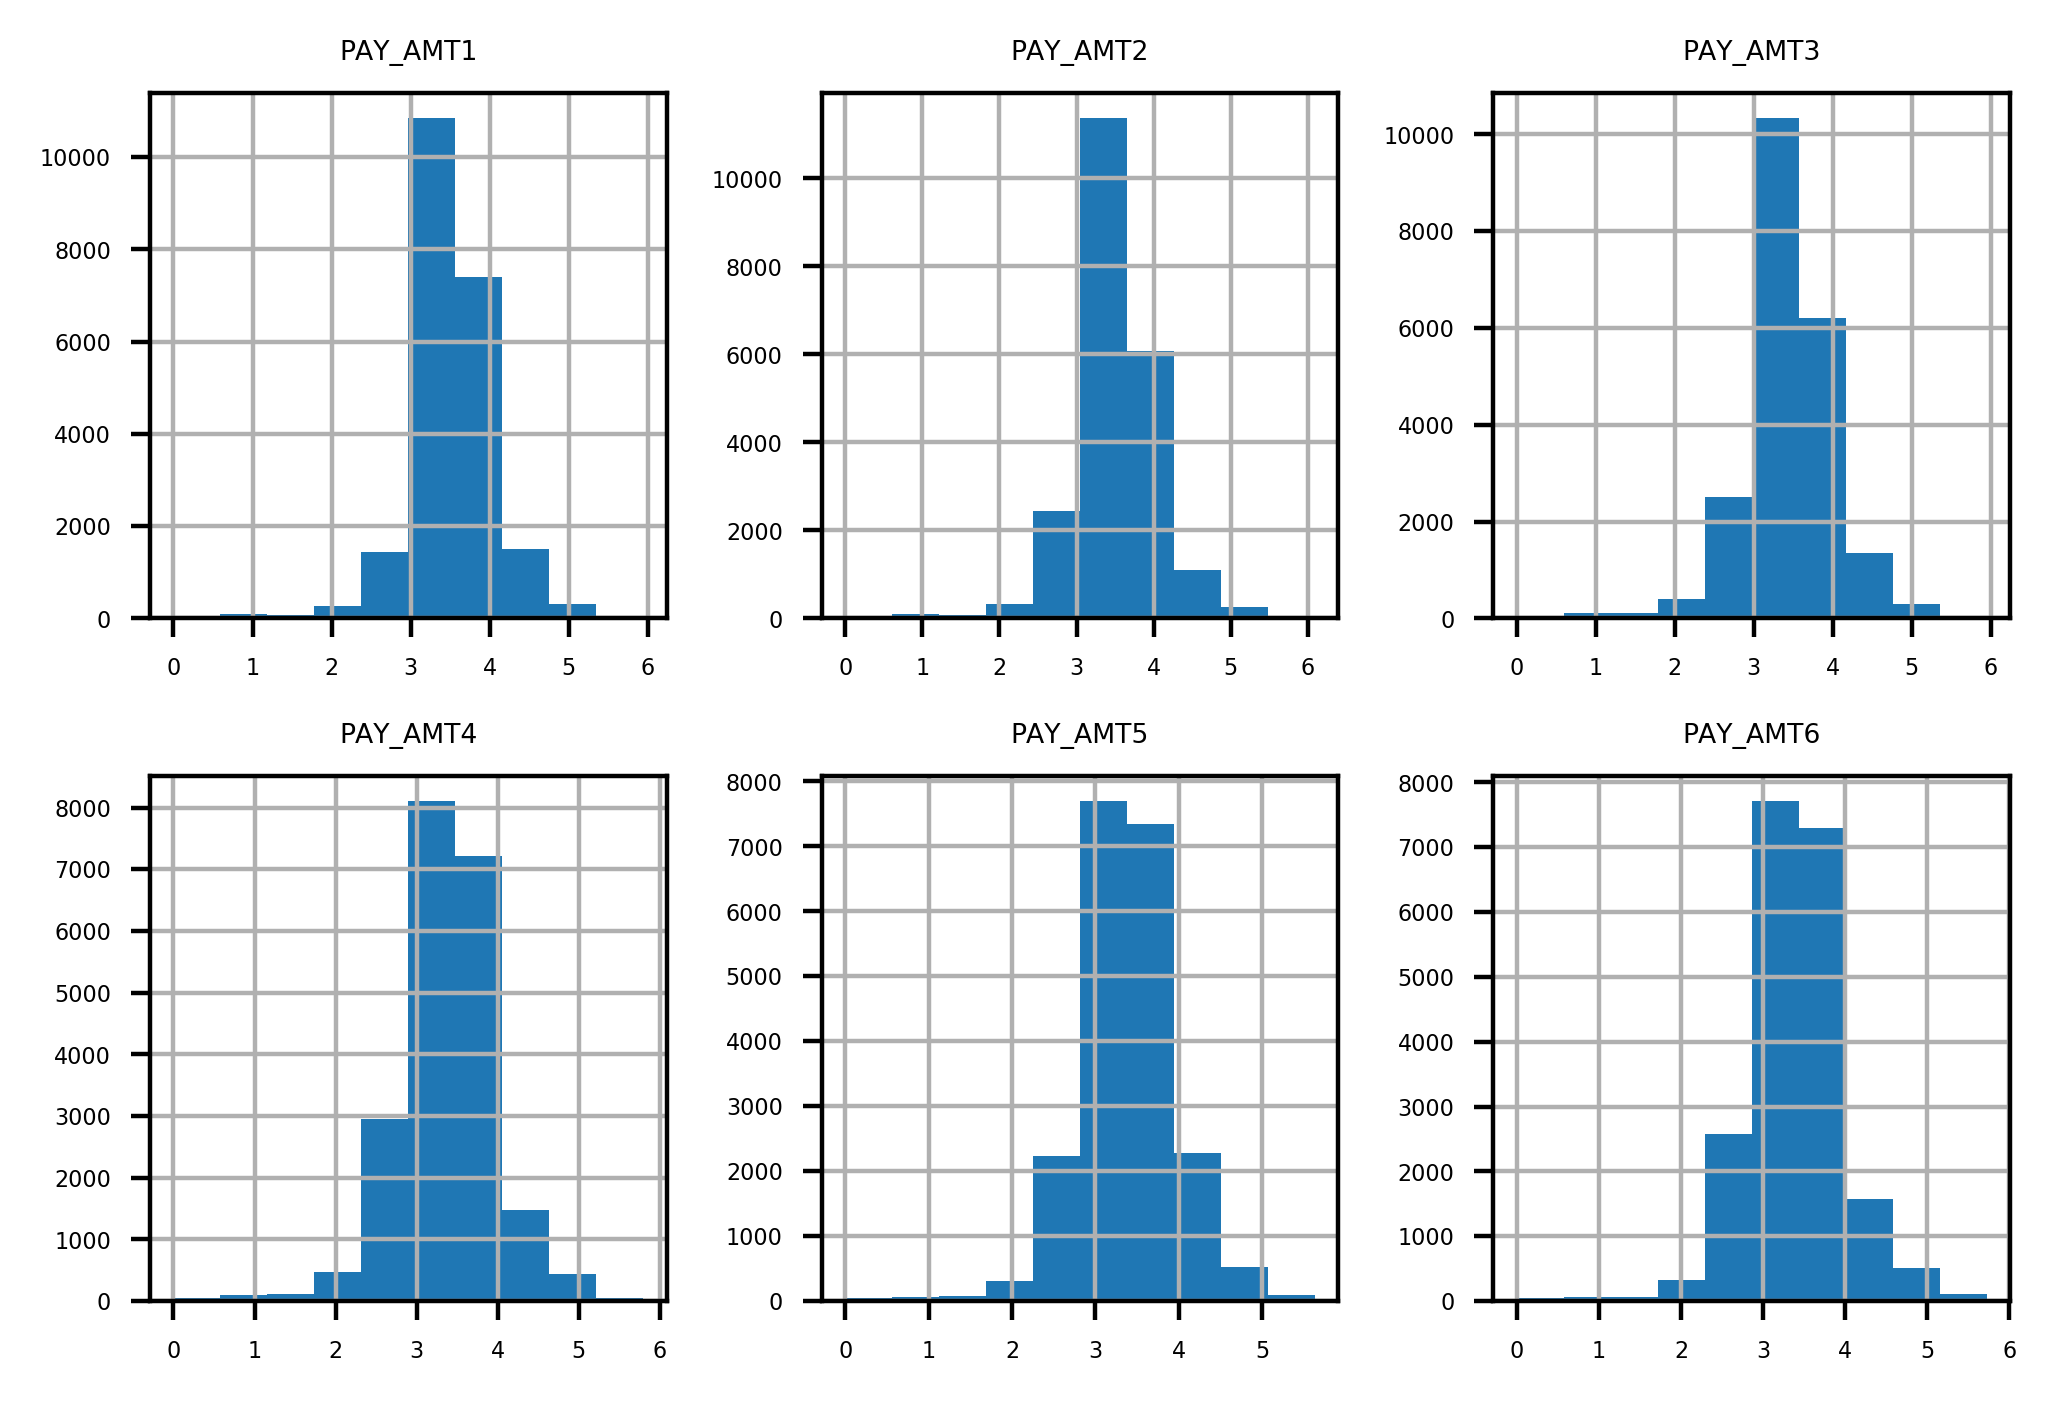

In [118]:
df[payamt_feats][~pay_zero_mask].apply(np.log10).hist(layout=(2,3))